# Height and outgoing SW

UKESM shows large reductions in outgoing SW for temperate/borel regions in the North Hemisphere (NH)
<img src="images/OUTSW_global.png">
> Fig 1: Right hand shows difference in annual average clear sky surface outgoing short-wave radiation between UKESM0.9 (u-aq226 - left plot) and GC3.1 (u-am001 - center). Avergage over 5 years after an initial 5 years of run

Partcularly in NH winter, averaging 18W/m2 decrease in surface outgoing radiation in areas of seasonal snow:
<img src="images/OUTSW_Asia5_winter.png">
> Fig 2: As fig 1 but average over January, Feburrary and March for 55 - 125 west and 40 - 52 North

## Impact of dynamic vegetation

Running with prescribed vegetation shows it is simulated vegetation which accounts for the bulk of the impact:
<img src="images/OUTSW_prescibed.png">
> Fig 3: As fig 1 and 2, but showing the difference between dynamic (u-ao912) and prescibed (u-aq142) for UKESM0.8, with an difference in winter in outgoing SW in seasonal snow regions of ~ 13 W/m2 

Most of this reduced outgoing SW is still present when running prescribed vegetation cover but simulated LAI and height:
<img src="images/OUTSW_prescibedCoverOnly.png">
> Fig 4: As fig 3 but between dynamic (u-ao912) and prescrived vegetation cover (u-aq222) for UKESM0.8. 

This suggests that around 10 W/m2 of the SW bias is caused by biases in LAI and/or height. The experiments outlined below therefore aim to either increase LAI (which also has a knock on effect to increase vegetation fraction) or decreasing height for grassy PFTs.

### Increasing LAI

#### Minimum leaf turnover rate

One way to increase LAI is reduce leaf turnover rate ($ \gamma_{lm}$). $ \gamma_{lm}$ is calculated from canopy (leaf) tempurature ($T_{c}$) as described by section 4 in Clark et al. (2011):

\begin{eqnarray}
    \gamma_{lm}=
\begin{cases}
    \gamma_{0},& \text{if } T_{c} > T_{off}\\
    \gamma_{0} \cdot (1 + d_{T} \cdot (T_{off} - T_{c})),& \text{if } T_{c} \leq T_{off}
\end{cases}
\end{eqnarray}

where $\gamma_{0}$ is a minimum leaf turnover rate in warm conditions, $T_{off}$ is a tempurature threshold and ($d_{T}$ = 9) is the rate of change of $\gamma_{lm}$ with respect to $T_{c}$.

For grassess, the original $\gamma_{0}$ in Clark et al. (2011) was set to 0.25/360 days (i.e, 25% of leaves would be turned over every year). Since Harper at al. 2016, and in UKESM, $gamma_{0}$ was increased to 3 (leaves turn over every 120 days). In the u-aq522 UKESM0.9 experiment, $\gamma_{0}$ was changed to 1 for all grasses (minimum leaf turnover time of one year).

Assuming standard values of  $T_{off} = 0$ and $d_{T} = 9$

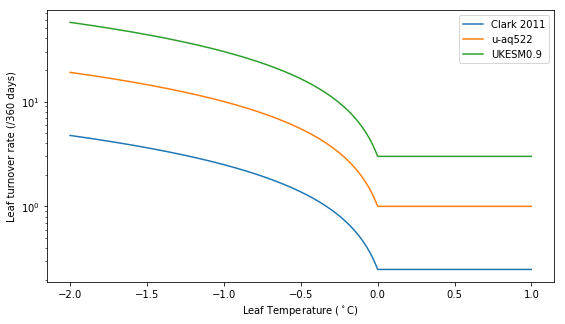

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from pdb import set_trace  as browser
plt.rcParams['figure.figsize'] = (20.0, 5.0)

T_off = 0.0
d_T = 9
T_c = np.arange(-2.0, 1.0, 0.001)

gamma_0 = [0.25, 1.0, 3.0]
label   = ['Clark 2011', 'u-aq522', 'UKESM0.9']

def gamma_lm(g0, T0, dT, T):
    glm = np.repeat(g0, len(T))
    glm[T < T0] *= (1 + dT * (T0 - T[T < T0]))
    #if T < T0: glm *= 
    return glm

plt.subplot(1,2,1)
for g0, lab in zip(gamma_0, label):
    glm = gamma_lm(g0, T_off, d_T, T_c)
    plt.plot(T_c, glm, label = lab)

plt.legend()
plt.yscale('log')
plt.xlabel('Leaf Temperature ($^\circ$C)')
plt.ylabel('Leaf turnover rate (/360 days)')
plt.show()

> Fig 5: Leaf turnover rate for (blue) Clark et al. (2011) where $\gamma_{0} = 0.25$; (green) UKESM0.9 as per Harder et al. (2016) with $\gamma_{0} = 3$; (orange) u-aq522 - UKESM0.9 with $gamma_{0} = 1$ for leaf temperature range between -2.0 and 1.0 $^\circ$C

u-aq522 does show an increase in leaf area index, and a corrisponding increase in grass cover, specially in semi-arid regions and in key seasonal snow regions
<img src="images/vegFrac_global_gamma0_allgrass.png">
> Fig6: Difference in fractional cover of PFTs and bare soil for UKESM0.9 runs u-aq522 and u-aq226. Postitive/negative values show increase/decrease in fractional cover as a result of $\gamma_{0}: 3 \rightarrow 1$

<img src="images/LAI_global_gamma0_allgrass.png">
> Fig7: As fig 6 but showing LAI


However, there is noise and non-conistant changes in outgoing SW
<img src="images/OUTSW_global_gammo_allgrass.png">
> Fig8: As fig 1 but between u-aq522 and u-aq226.






### Increasing Height
#### Height UKESM0.9 vs prescribed vegetation
UKESM0.9 generally simulates natural grasses that are shorter than observations, but agricultural grassland areas that are too tall. 

> Fig 9: UKESM0.9 (takem from u-aq226) height vs prescribed height used in u-aq142 for each PFT

#### Allocation and allometry
Carbon is split between leaf ($L$), stem ($W$) and root($R$):


\begin{eqnarray}
    L = R = \sigma_{1} \cdot LAI_{b}
\end{eqnarray}
\begin{eqnarray}
    W = a_{wl} \cdot LAI_{b}^{b_{wl}}
\end{eqnarray}

where $\sigma_{1}$ is leaf denisty, $LAI_{b}$ is the Lead Area Index when plant is in "full leaf" (i.e when $T_{c} > T_{off}$) and $a_{wl}$ and $b_{wl}$ are PFT-dependant allometric parameters.


The Shinozaki et al. (1964a,b) "pipe model" described respiring stemwood ($S$) ad proportional to LAI and canopy height ($h$):
\begin{eqnarray}
    S = \eta_{sl} \cdot h \cdot LAI
\end{eqnarray}

where $\eta_{sl}$ is a constant of proportionality, set to 0.01 for all PFTs.

Assuming W is proportial to S (i.e $W = a_{ws} \cdot S$, with $a_{ws} = 1$ for grasses), the two previous equations are combined in Clark et al. 2011 to give:


\begin{eqnarray}
    h = \frac{W}{a_{ws} \cdot \eta_{sl}} \cdot \Big(\frac{a_{wl}}{W}\Big)^{1/b_{wl}}
\end{eqnarray}

or

\begin{eqnarray}
    h = \frac{LAI_{b}^{b_{wl}}}{a_{ws} \cdot \eta_{sl}} \cdot \Big(\frac{a_{wl}}{ LAI_{b}^{b_{wl}} }\Big)^{1/b_{wl}}
\end{eqnarray}


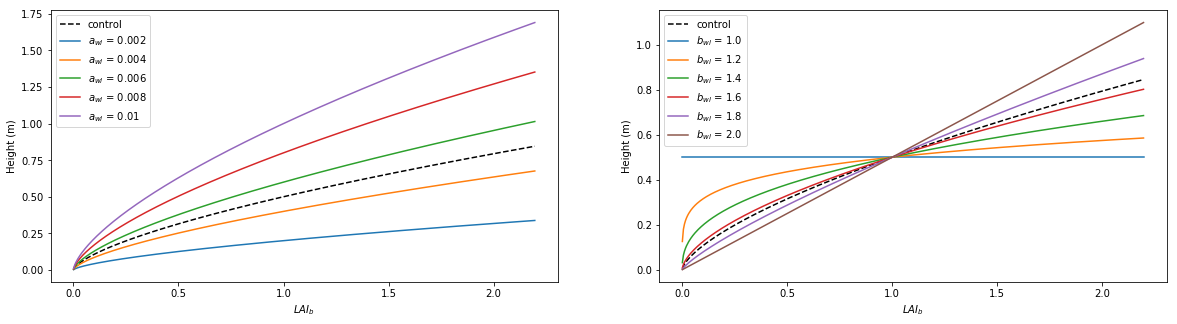

In [2]:
## Set typical parameters
LAI_b = np.arange(0.001, 2.2, 0.005)
a_wl_control = 0.005
b_wl_control = 1.667

## Set experiment paramters
a_wl = np.arange(0.002, 0.0101, 0.002)
b_wl = np.arange(1.0, 2.01, 0.2)

## Heigt calculation (see previous two equations)
def woodC(LAI_b, a_wl, b_wl):
    return a_wl * LAI_b ** b_wl
    
def height(LAI_b, a_wl, b_wl, a_ws = 1.0, eta_sl = 0.01):
    W = woodC(LAI_b, a_wl, b_wl)
    return W / (a_ws * eta_sl) * ((a_wl / W)** (1/b_wl))


## Height calculated for UKESM0.9
h0 = height(LAI_b, a_wl_control, b_wl_control)

## Plotting altering a_wl
plt.subplot(1,2,1)
plt.plot(LAI_b, h0, 'k--', label = 'control')
for a in a_wl:
    h = height(LAI_b, a, b_wl_control)
    plt.plot(LAI_b, h, label = "$a_{wl}$ = " + str(a))

plt.legend()
plt.xlabel('$LAI_b$')
plt.ylabel('Height (m)')

## Plotting altering b_wl
plt.subplot(1,2,2)
plt.plot(LAI_b, h0, 'k--', label = 'control')
for b in b_wl:
    h = height(LAI_b, a_wl_control, b)
    plt.plot(LAI_b, h, label = "$b_{wl}$ = " + str(b))

plt.legend()
plt.xlabel('$LAI_b$')
plt.ylabel('Height (m)')

plt.show()

> Fig 10: Height vs $LAI_b$ following equations in Clark et al. (2011). Black dotted lines for parameters in UKESM0.9 ($a_{wl} = 0.005$ and $b_{wl} = 5/2$). Left show response for changing $0.002 \leq a_{wl} \leq 0.010$, right $1 \leq b_{wl} \leq 2.0$. 

Changes in height are proportional to changes in $a_{wl}$ for all $LAI_b$ and can be used to increase/decrease height over all regions. Changes in $b_{wl}$ change height depending on $LAI_b$: for high coverage ($LAI > 1$), increasing $b_{wl}$  will increase hight, whereas for thin coverage ($LAI < 1$) it will decrease height. When $b_{wl} = 1$, height$ = 100 \cdot a_{wl}$ ( or $ = 0.5$ when $a_{wl}$ takes the default value of 1.0) across all $LAI_b$'s, and when $b_{wl} = 2$, height$ = 100 \cdot a_{wl} \cdot LAI_{b}$ (or $= LAI_b / 2$)

#### Reducing $a_{wl}$

u-aq717 increases $a_{wl}: 0.005 \rightarrow 0.05$ (thereby increasing height) and u-aq724 reduced $a_{wl}: 0.005 \rightarrow 0.0005$ (reducing height). Both affect outgoing SW, with u-aq724 increasing, while u-aq717 is almost a mirror image, reducing outgoing SW.

<img src="images/height_global_awl_allgrass.png">
> Fig11: Difference in height of PFTs for UKESM0.9 runs u-aq724 - u-aq226. Postitive/negative values show increase/decrease in height as a result of $a_{wl}: 0.005 \rightarrow 0.0005$


<img src="images/vegFrac_global_awl_allgrass.png">
> Fig12: As fig 11 but showing fractional cover

<img src="images/LAI_global_awl_allgrass.png">
> Fig13: As fig 11 but showing LAI


<img src="images/OUTSW_global_awl_allgrass.png">
<img src="images/OUTSW_Asia5_awl_allgrass.png">
> Fig14: Top: as fig 1 but between u-aq724 - u-aq226. Middle left: Difference in outgoing clear sky surface shortwave between u-aq724 (left) and u-aq226 (right). Bottom: outgoing clearsky SW TS for (blue - left axis) u-aq724 (green -left axis) u-aq226 (red - right axis) difference between the two.

#### Increasing $a_{wl}$

<img src="images/height_global_iawl_allgrass.png">
> Fig15: Difference in height of PFTs for UKESM0.9 runs u-aq717 - u-aq226. Postitive/negative values show increase/decrease in height as a result of $a_{wl}: 0.005 \rightarrow 0.05$

<img src="images/OUTSW_global_iawl_allgrass.png">
<img src="images/OUTSW_Asia5_iawl_allgrass.png">
> Fig16: Top: as fig 1 but between u-aq717 - u-aq226. Middle left: Difference in outgoing clear sky surface shortwave between u-aq724 (left) and u-aq226 (right). Bottom: outgoing clearsky SW TS for (blue - left axis) u-aq724 (green -left axis) u-aq226 (red - right axis) difference between the two.

u-aq767 is a less severe version of u-aq724, with reduced $a_{wl}: 0.005 \rightarrow 0.001$ to reduce grass height. 

<img src="images/height_global_awls_allgrass.png">
> Fig17: As fig 11 but showing u-aq724 - u-aq226. Postitive/negative values show increase/decrease in height as a result of $a_{wl}: 0.005 \rightarrow 0.001$


<img src="images/vegFrac_global_awls_allgrass.png">
> Fig18: As fig 11 but showing fractional cover

<img src="images/LAI_global_awls_allgrass.png">
> Fig19: As fig 11 but showing LAI

<img src="images/snow_global_awls_allgrass.png">
<img src="images/snow_Asia5_awls_allgrass.png">
> Fig20: Snow mass

<img src="images/albedo_global_awls_allgrass.png">
<img src="images/albedo_Asia5_awls_allgrass.png">
> Fig21: Albedo


<img src="images/OUTSW_global_awls_allgrass.png">
<img src="images/OUTSW_Asia5_awls_allgrass.png">
> Fig22: Top: as fig 1 but between u-aq724 - u-aq226. Middle left: Difference in outgoing clear sky surface shortwave between u-aq724 (left) and u-aq226 (right). Bottom: outgoing clearsky SW TS for (blue - left axis) u-aq724 (green -left axis) u-aq226 (red - right axis) difference between the two.

#### Increasing $b_{wl}$
u-aq755 increases $b_{wl}:(5/3) \rightarrow (2)$ for grasses. This should make low coverage grasses ($LAI < 1$) shorter and hig coverage ($LAI > 1$) taller. This has a mixed effect on outgoing shortwave, probably because, for a lot of areas in the target region, LAI hovers around $LAI_{min}$ (the minimum LAI to allow grass spread) which is set to 1. 


<img src="images/height_global_bwl_allgrass.png">
> Fig23: Difference in height of PFTs for UKESM0.9 runs u-aq755 - u-aq226. Postitive/negative values show increase/decrease in height as a result of $a_{wl}: 0.005 \rightarrow 0.05$

<img src="images/OUTSW_global_bwl_allgrass.png">
> Fig24: Top: as fig 1 but between u-aq717 - u-aq226.

Results could be more promising if combined with a reduction in $LAI_{min}$. i.e, if $LAI_{min} = 0.7$, height is the region would reduce from:

In [14]:
height(LAI_b = 1.0, a_wl = 0.005, b_wl = 5.0/3.0)

0.5

too

In [12]:
height(LAI_b = 0.7, a_wl = 0.005, b_wl = 2)

0.35

### Targetting GC3.1 height
<img src="images/diff_height_UKESM09_vs_GC31.png">
>Fig 25: Difference in height between UKESM0.9 (from u-aq226) and GC3.1 (u-am001 ancil file) for each PFT 

#### Optimized $a_{wl}$, $b_{wl}$ and $a_{ws}$

u-aq820 uses allometry parameters optimized against hight/lai from GC3.1

<img src="images/height_global_awlO_allgrass.png">
> Fig26: Difference in height of PFTs for UKESM0.9 runs u-aq820 - u-aq226. Postitive/negative values show increase/decrease in height as a result of using optimized allometry parameters


<img src="images/OUTSW_global_awlO_allgrass.png">
<img src="images/OUTSW_Asia5_awlO_allgrass.png">
> Fig27: Top: as fig 1 but between u-aq820 - u-aq226. Middle left: Difference in outgoing clear sky surface shortwave between u-aq724 (left) and u-aq226 (right). Bottom: outgoing clearsky SW TS for (blue - left axis) u-aq804 (green -left axis) u-aq226 (red - right axis) difference between the two.

## Whats going on?

### Decoupling snow/albedo LAI exposure from height

u-aq775 sets height to 1cm for all grasses when calculating LAI distribution through the snow pack. Height itself is unaltered in other parts of the model

<img src="images/snow_global_decoupled_allgrass.png">
<img src="images/snow_Asia5_decoupled_allgrass.png">
> Fig28: Snow mass

<img src="images/albedo_global_decoupled_allgrass.png">
<img src="images/albedo_Asia5_decoupled_allgrass.png">
> Fig29: Albedo


<img src="images/OUTSW_global_decoupled_allgrass.png">
<img src="images/OUTSW_Asia5_decoupled_allgrass.png">
> Fig30: OUTSW.

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


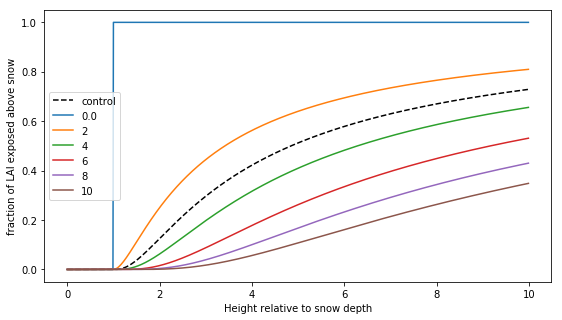

In [34]:
 def lai_exposed(lai, snowdepth, height, n):
    lai = lai * (1 - snowdepth / height) ** n
    lai[height < snowdepth] = 0.0
    return lai


    
height   = np.arange(0.0, 10.0, 0.01)
nControl = 3
nTest    = [0.0, 2, 4, 6, 8, 10]


lai_Control = lai_exposed(1.0, 1.0, height, nControl)

plt.subplot(1,2,1)
plt.plot(height, lai_Control, 'k--', label = 'control')
for n in nTest:
    lai_test = lai_exposed(1.0, 1.0, height, n)
    plt.plot(height, lai_test, label = str(n))

plt.legend()
plt.xlabel('Height relative to snow depth')
plt.ylabel('fraction of LAI exposed above snow')
plt.show()

## References

* Clark, D. B., et al. "The Joint UK Land Environment Simulator (JULES), model description-Part 2: carbon fluxes and vegetation dynamics." Geoscientific Model Development 4.3 (2011): 701.
* Harper, Anna B., et al. "Improved representation of plant functional types and physiology in the Joint UK Land Environment Simulator (JULES v4. 2) using plant trait information." Geoscientific Model Development 9.7 (2016): 2415.
* Shinozaki, Kichiro, et al. "A quantitative analysis of plant form-the pipe model theory: I. Basic analyses." Japanese Journal of ecology 14.3 (1964a): 97-105.
* Shinozaki, Kichiro, et al. "A quantitative analysis of plant form-the pipe model theory: II. Further evidence of the theory and its application in forest ecology." Japanese Journal of Ecology 14.4 (1964b): 133-139.
